# Análisis Exploratorio de Datos

Se importa las librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

Se crea un DataFrame con los datos de la Categoría Educación

In [2]:
df = pd.read_csv('../Data/data_educacion.csv')

Un .info() para tener idea de cuantas columnas y que tipo de datos hay en cada una de ellas, y si tenemos datos Nan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   país            176 non-null    object 
 1   codigo_pais     176 non-null    object 
 2   factor_(serie)  176 non-null    object 
 3   codigo_serie    176 non-null    object 
 4   1987            15 non-null     float64
 5   1988            17 non-null     float64
 6   1989            20 non-null     float64
 7   1990            32 non-null     float64
 8   1991            32 non-null     float64
 9   1992            17 non-null     float64
 10  1993            17 non-null     float64
 11  1994            20 non-null     float64
 12  1995            13 non-null     float64
 13  1996            13 non-null     float64
 14  1997            11 non-null     float64
 15  1998            3 non-null      float64
 16  1999            15 non-null     float64
 17  2000            25 non-null     flo

In [4]:
df.head()

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afganistán,AFG,"Nivel de instrucción, al menos ciclo inferior ...",SE.SEC.CUAT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.1258,NaN,NaN,NaN,NaN,NaN,11.6319,15.3429
1,Afganistán,AFG,"Nivel de instrucción, al menos ciclo superior ...",SE.SEC.CUAT.UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9.7924,NaN,NaN,NaN,NaN,NaN,9.4613,12.5973
2,Afganistán,AFG,"Nivel de instrucción, al menos escuela de nive...",SE.SEC.CUAT.PO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.7049,NaN
3,Afganistán,AFG,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.5213,54.6933,56.7369,59.7218,NaN,NaN,NaN
4,Alemania,DEU,"Nivel de instrucción, al menos ciclo inferior ...",SE.SEC.CUAT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,96.6718,96.7991,96.7161,96.5136,NaN,96.3323,NaN,95.6804,NaN,NaN


In [5]:
df[df['país']=='Argentina']

,país,codigo_pais,factor_(serie),codigo_serie,1987,1988,1989,1990,1991,1992,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
16,Argentina,ARG,"Nivel de instrucción, al menos ciclo inferior ...",SE.SEC.CUAT.LO.ZS,NaN,NaN,NaN,NaN,37.3563,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Argentina,ARG,"Nivel de instrucción, al menos ciclo superior ...",SE.SEC.CUAT.UP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Argentina,ARG,"Nivel de instrucción, al menos escuela de nive...",SE.SEC.CUAT.PO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Argentina,ARG,Tasa de finalización del ciclo inferior de la ...,SE.SEC.CMPT.LO.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.3374,88.4963,90.4596,90.7401,91.813,93.5833,95.9255,95.4993,108.7882,NaN


Se utiliza .describe() para obtener una visión general de las estadísticas clave de las columnas numéricas en tu conjunto de datos

In [6]:
columnas = ['1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001','2002', '2003']
descripcion1 = df[columnas].describe().round(2)
descripcion1

,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003
count,15.00,17.00,20.00,32.00,32.00,17.00,17.00,20.00,13.00,13.00,11.00,3.00,15.00,25.00,37.00,40.00,39.00
mean,57.26,51.36,49.96,44.87,48.59,52.60,52.81,65.21,55.92,44.84,55.52,88.49,64.48,45.75,44.11,54.14,55.11
std,30.39,34.11,34.30,31.31,29.90,32.28,26.71,30.81,26.68,28.72,28.12,15.40,25.45,28.78,26.44,27.69,27.54
min,0.92,1.00,1.58,1.74,1.65,1.70,5.66,5.86,6.07,6.47,5.98,70.81,24.85,4.27,4.57,4.17,4.59
25%,39.31,29.09,23.08,19.53,32.54,31.77,30.13,47.00,32.80,25.58,39.76,83.27,42.65,30.06,24.69,36.13,35.80
50%,53.95,43.84,49.39,36.22,48.12,60.50,48.25,63.79,60.04,45.12,64.10,95.72,62.50,41.84,41.50,50.00,55.76
75%,81.59,79.99,70.32,65.74,63.81,65.78,66.65,87.37,72.71,61.87,71.19,97.33,84.29,67.01,62.94,81.04,79.25
max,108.85,108.95,108.20,106.51,106.47,107.71,107.14,111.39,104.56,99.16,101.06,98.93,98.69,98.68,98.82,101.33,102.24


El análisis se divide en dos secciones debido al amplio rango de años considerado, que abarca desde 1987 hasta 2022. Esta separación facilita la evaluación detallada de los indicadores a lo largo de un extenso período temporal.

In [7]:
columnas = ['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
descripcion2 = df[columnas].describe().round(2)
descripcion2

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,57.00,63.00,68.00,72.00,68.00,79.00,85.00,87.00,82.00,64.00,89.00,86.00,88.00,75.00,76.00,81.00,83.00,58.00,19.00
mean,55.53,57.89,53.04,53.76,57.83,58.46,62.71,61.32,61.17,64.68,61.41,60.80,65.42,65.34,63.19,64.40,68.78,69.07,56.94
std,29.09,27.04,27.01,29.72,27.22,30.24,27.81,28.40,29.72,26.10,29.42,28.97,25.31,27.54,30.66,30.00,26.55,30.22,32.17
min,5.47,6.81,1.84,0.27,1.85,2.04,7.92,9.34,1.70,11.69,0.00,5.83,13.48,8.16,2.02,4.56,10.96,4.70,12.60
25%,32.51,35.12,32.91,32.10,37.70,33.45,39.47,36.98,37.79,44.58,37.67,35.25,45.69,46.61,41.03,40.84,49.22,50.28,31.16
50%,57.12,59.33,50.77,52.06,57.74,63.18,65.52,66.57,61.51,69.16,69.42,68.96,70.01,68.85,68.03,70.41,75.11,75.08,54.12
75%,80.83,80.80,73.79,75.79,79.13,83.69,86.43,86.67,87.47,89.48,88.31,87.45,89.03,91.27,92.69,91.03,92.51,95.69,87.49
max,101.23,101.41,102.53,103.20,103.00,102.46,102.90,105.29,115.66,100.79,99.86,101.78,107.37,104.85,103.38,129.95,111.69,108.79,101.38


Este Dataset comprende un extenso periodo, desde 1987 hasta 2022, con un rango variable de observaciones, desde un mínimo de 3 a un máximo de 89. Las desviaciones estándar permanecen consistentes, entre 25 y 32, destacando la dispersión de los datos en cada año. La media de los indicadores se mantiene alrededor de 60-70, mostrando cierta estabilidad a lo largo de las décadas. Los valores mínimo y máximo varían notablemente, desde 0 hasta 12.60 como mínimo, y desde 99.86 hasta 129.95 como máximo, evidenciando la amplitud y diversidad de los datos a lo largo del tiempo. En resumen, el conjunto de datos proporciona un amplio espectro para analizar tendencias, cambios y distribución de indicadores específicos para múltiples países a lo largo de un amplio período temporal.

Para conocer si tenemos valores faltantes en las columnas de ['país'] ['codigo_pais'] ['factor_(serie)'] ['codigo_serie']

In [8]:
print(df['país'].isna().sum())
print(df['codigo_pais'].isna().sum())
print(df['factor_(serie)'].isna().sum())
print(df['codigo_serie'].isna().sum())


0
0
0
0


Veamos en que países se encuentran en estudio.

In [9]:
cantidad_paises = len(df['país'].unique())
print('Cantidad de paises en estudio:',cantidad_paises)
pd.DataFrame(df['país'].unique(), columns=['Países'])

Cantidad de paises en estudio: 44


,Países
0,Afganistán
1,Alemania
2,Argelia
3,Arabia Saudita
4,Argentina
5,Australia
6,Austria
7,Brasil
8,Burkina Faso
9,China


El conjunto de países en estudio refleja una diversidad geográfica significativa, representando un total de 43 naciones. Esta recopilación abarca una amplia distribución global, incluyendo países de distintos continentes, como Asia con naciones como China, India, y Japón; Europa con Alemania, España y Noruega; América con Estados Unidos, Argentina y Venezuela; África con Argelia, Nigeria y Rwanda; Oceanía con Australia, Fiji y Nueva Zelanda, entre otros. Esta diversidad geográfica sugiere una representación global en los datos, proporcionando la oportunidad de estudiar y comparar patrones, tendencias y características distintivas de cada continente en el análisis.

Veamos que Factores se estudian en la Categoría educación

In [10]:
cantidad_series = len(df['factor_(serie)'].unique())
print('Cantidad de variables en estudio la categoría Educación:',cantidad_series)
serie_unicos = df['factor_(serie)'].unique()
print(serie_unicos)

Cantidad de variables en estudio la categoría Educación: 4
['Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)'
 'Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)'
 'Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)'
 'Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)']


Reorganizamos el DataFrame

In [11]:
# Eliminar columnas específicas por nombre
columnas_a_eliminar = ['codigo_pais', 'codigo_serie']  # Lista con los nombres de las columnas a eliminar
df = df.drop(columnas_a_eliminar, axis=1)

In [12]:
# Reorganizar los datos para tener 'factor_(serie)' como índice y los años como valores en una sola columna
df_reorganizado = df.melt(id_vars=['país', 'factor_(serie)'], var_name='Año', value_name='Valor')

# Mostrar el DataFrame reorganizado
df_reorganizado

,país,factor_(serie),Año,Valor
0,Afganistán,"Nivel de instrucción, al menos ciclo inferior ...",1987,NaN
1,Afganistán,"Nivel de instrucción, al menos ciclo superior ...",1987,NaN
2,Afganistán,"Nivel de instrucción, al menos escuela de nive...",1987,NaN
3,Afganistán,Tasa de finalización del ciclo inferior de la ...,1987,NaN
4,Alemania,"Nivel de instrucción, al menos ciclo inferior ...",1987,NaN
...,...,...,...,...
6331,Kenya,Tasa de finalización del ciclo inferior de la ...,2022,NaN
6332,Noruega,"Nivel de instrucción, al menos ciclo inferior ...",2022,NaN
6333,Noruega,"Nivel de instrucción, al menos ciclo superior ...",2022,NaN
6334,Noruega,"Nivel de instrucción, al menos escuela de nive...",2022,NaN


In [13]:
df_reorganizado['Valor'].describe()

count    1746.000000
mean       59.501718
std        29.032712
min         0.000000
25%        36.298250
50%        60.580000
75%        85.584600
max       129.953700
Name: Valor, dtype: float64

Como se puede observar en el análisis anterior con un total de 1746 registros no nulos, se observa que la media de los valores es aproximadamente 59.50, con una dispersión significativa reflejada por una desviación estándar de alrededor de 29.03 unidades. El rango de valores es considerable, oscilando desde un mínimo de 0 hasta un máximo de 129.95. La mediana, situada en aproximadamente 60.58, indica que el 50% de los datos caen por debajo de este valor, mientras que el otro 50% se encuentra por encima. Los percentiles muestran que el 25% de los datos son inferiores a 36.30 y el 75% son inferiores a 85.58, evidenciando la distribución de los valores en el conjunto de datos. Estos datos resumen la variabilidad, la centralidad y la amplitud de la información presente en la columna 'Valor'.

In [14]:
repetitions = df_reorganizado['factor_(serie)'].value_counts()
print(repetitions)

Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)       1584
Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)       1584
Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)    1584
Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)                                   1584
Name: factor_(serie), dtype: int64


Para Validar que factor cuenta con mejor cantidad de datos, se consulta de la siguiente manera:

In [15]:
unique_factors = ['Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)',
 'Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)']

for factor in unique_factors:
    filtered_data = df_reorganizado[df_reorganizado['factor_(serie)'] == factor]
    description = filtered_data['Valor'].describe()
    print(f"Descripción para el factor '{factor}':\n{description}\n")


Descripción para el factor 'Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)':
count    370.000000
mean      64.826965
std       25.714869
min        2.036200
25%       45.282500
50%       63.170150
75%       91.208100
max       99.859800
Name: Valor, dtype: float64

Descripción para el factor 'Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, población de más de 25 años, total (%) (acumulativo)':
count    404.000000
mean      53.461496
std       23.176532
min        0.495100
25%       34.627500
50%       53.208350
75%       73.827175
max       92.176800
Name: Valor, dtype: float64



In [16]:
unique_factors = ['Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)',
 'Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)']

for factor in unique_factors:
    filtered_data = df_reorganizado[df_reorganizado['factor_(serie)'] == factor]
    description = filtered_data['Valor'].describe()
    print(f"Descripción para el factor '{factor}':\n{description}\n")

Descripción para el factor 'Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa, población de más de 25 años, total (%) (acumulativo)':
count    233.000000
mean      28.728891
std       14.838201
min        0.000000
25%       14.687200
50%       30.560600
75%       37.572800
max       76.293700
Name: Valor, dtype: float64

Descripción para el factor 'Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente)':
count    739.000000
mean      69.839981
std       29.320282
min        0.917800
25%       52.698100
50%       77.705600
75%       94.966250
max      129.953700
Name: Valor, dtype: float64



Si queríamos conocer cual es el factor con mejor calidad de datos es Tasa de finalización del ciclo inferior de la educación secundaria, total (% del grupo etario pertinente) con 739 registros de 1584

Ante la presencia significativa de valores faltantes (NaN) en nuestro conjunto de datos, se optó por aplicar una estrategia de imputación. Esta estrategia consiste en el reemplazo de los valores faltantes por la media de los datos, tomando en consideración la especificidad de cada país como también la del factor en estudio. Este enfoque nos permite abordar la ausencia de datos, asegurando una mayor integridad en nuestro conjunto de datos al evitar vacíos o valores faltantes, lo que resulta crucial para un análisis robusto y confiable.

In [17]:
def fill_missing_with_country_factor_mean(df):
    means_by_country_factor = df.groupby(['país', 'factor_(serie)'])['Valor'].transform('mean')
    df['Valor'] = df['Valor'].fillna(means_by_country_factor)
    return df

# Llamada a la función para rellenar los valores faltantes con la media por país y factor
df_filled = fill_missing_with_country_factor_mean(df_reorganizado)

In [18]:
df_filled

,país,factor_(serie),Año,Valor
0,Afganistán,"Nivel de instrucción, al menos ciclo inferior ...",1987,13.366867
1,Afganistán,"Nivel de instrucción, al menos ciclo superior ...",1987,10.617000
2,Afganistán,"Nivel de instrucción, al menos escuela de nive...",1987,4.704900
3,Afganistán,Tasa de finalización del ciclo inferior de la ...,1987,43.790883
4,Alemania,"Nivel de instrucción, al menos ciclo inferior ...",1987,96.720127
...,...,...,...,...
6331,Kenya,Tasa de finalización del ciclo inferior de la ...,2022,80.665067
6332,Noruega,"Nivel de instrucción, al menos ciclo inferior ...",2022,99.546254
6333,Noruega,"Nivel de instrucción, al menos ciclo superior ...",2022,74.675850
6334,Noruega,"Nivel de instrucción, al menos escuela de nive...",2022,33.707636


In [19]:
df_filled['Valor'].describe()

count    5868.000000
mean       52.076291
std        30.729631
min         0.000000
25%        25.728407
50%        50.626300
75%        78.337762
max       129.953700
Name: Valor, dtype: float64

Una vez realizado la imputacion se evidencia que aun tenemos datos en Nan

In [20]:
df_filled['Valor'].isna().sum()

468

Mostramos los paises que no tiene datos en los años seleccionados.

In [28]:
df_filled[df_filled['Valor'].isna()]['país'].unique()

array(['Argelia', 'Argentina', 'Australia', 'Brasil', 'Canadá', 'Chad',
       'Costa Rica', 'Estados Unidos', 'Marruecos', 'Nueva Zelandia',
       'Rwanda'], dtype=object)


Debido a que no podemos inventar datos para esos años y para los países seleccionados, se procede a eliminar esas filas donde el valor es Nan

In [31]:
df_filled.dropna(inplace=True)

## Observemos la distribución de los factores por cada país a continuación 

In [23]:
# Obtener los factores únicos por país
factores_por_pais = df_filled.groupby(['país'])['factor_(serie)'].unique().apply(list).to_dict()

# Crear una lista con los nombres de los países en el DataFrame
paises = df_filled['país'].unique().tolist()

# Crear un widget de menú desplegable (dropdown) para seleccionar un país
dropdown_paises = widgets.Dropdown(
    options=paises,
    description='Seleccionar país:'
)

# Función para graficar los datos por país seleccionado
def graficar_datos_por_pais(pais):
    
    datos_pais = df_filled[df_filled['país'] == pais]

    fig = go.Figure()
    
    for factor in factores_por_pais[pais]:
        datos_factor = datos_pais[datos_pais['factor_(serie)'] == factor]
        fig.add_trace(go.Scatter(x=datos_factor['Año'], y=datos_factor['Valor'], mode='lines+markers', name=factor))
    
    fig.update_layout(
        title=f'Datos para {pais}',
        xaxis_title='Año',
        yaxis_title='Valor',
        legend=dict(x=0, y=-1.2, orientation='h'),
        height=450,
        width=1200
    )
    fig.show()

# Mostrar un widget vacío para eliminar el gráfico por defecto
display(widgets.Output())

# Interactividad: enlazar el widget de menú desplegable a la función de graficado
widgets.interactive(graficar_datos_por_pais, pais=dropdown_paises)


Output()

interactive(children=(Dropdown(description='Seleccionar país:', options=('Afganistán', 'Alemania', 'Argelia', …

### Seguido de esto, veremos como estan concentrados los datos y si existen valores atipicos (outliers) en nuestro dataset

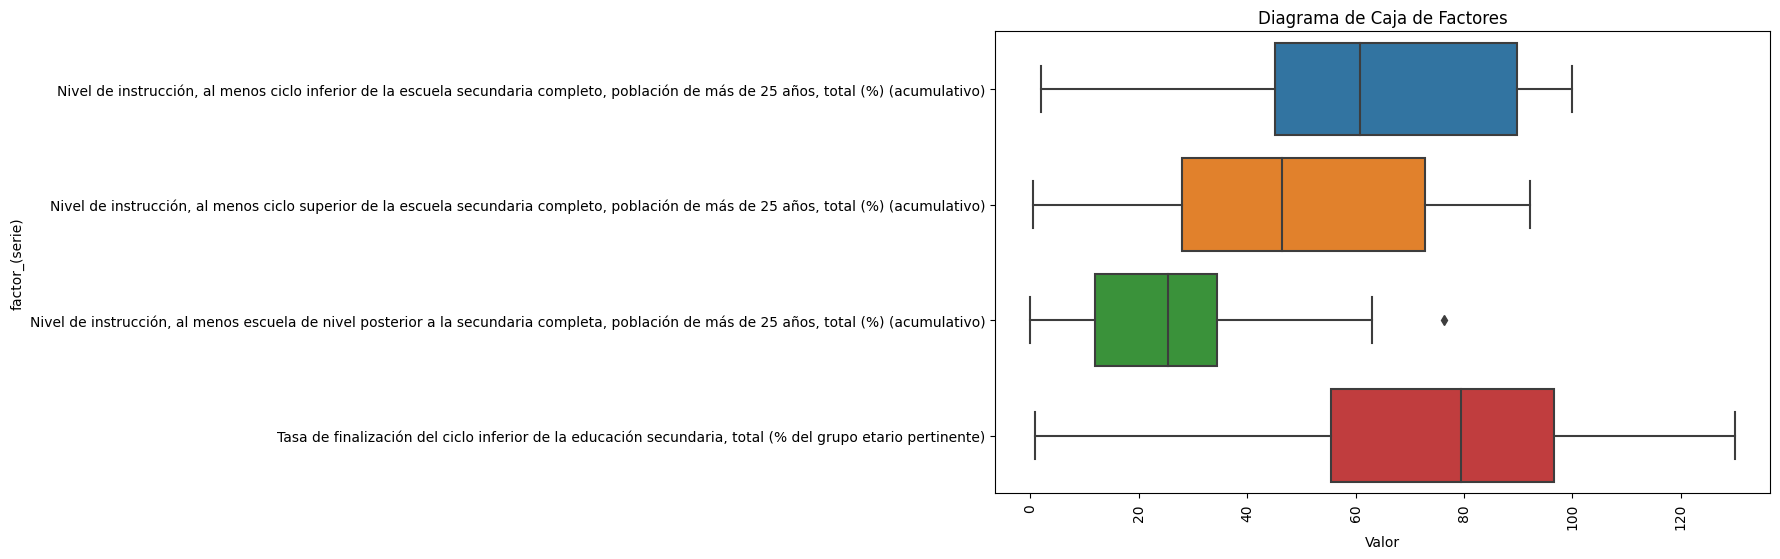

In [24]:
# Suponiendo que 'df' es tu DataFrame de factores

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot utilizando Seaborn
sns.boxplot(y='factor_(serie)', x='Valor', data=df_filled)
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.title('Diagrama de Caja de Factores')
plt.show()


1.- Nivel de instrucción, al menos ciclo inferior de la escuela secundaria completo:
Este factor presenta un promedio del 60.47%, con una desviación estándar de 28.87%. El rango intercuartílico (IQR) abarca desde el 25% al 75%, con valores que oscilan entre el 45.16% y el 89.69%. El valor mínimo observado es 2.04%, mientras que el máximo alcanza el 99.86%.

2.- Nivel de instrucción, al menos ciclo superior de la escuela secundaria completo:
El nivel de instrucción, al menos ciclo superior de la escuela secundaria completo, tiene un promedio del 47.23%, con una desviación estándar de 26.09%. Su rango intercuartílico (IQR) va desde el 27.96% hasta el 72.74%. Los valores extremos registrados son 0.50% como mínimo y 92.18% como máximo.

3.- Nivel de instrucción, al menos escuela de nivel posterior a la secundaria completa:
Este factor presenta un promedio del 24.28%, con una desviación estándar de 15.85%. El rango intercuartílico (IQR) abarca desde el 25% al 75%, con valores que oscilan entre el 11.92% y el 34.38%. El valor mínimo registrado es 0%, mientras que el máximo alcanza el 76.29%.

4.- Tasa de finalización del ciclo inferior de la educación secundaria:
La tasa de finalización del ciclo inferior de la educación secundaria exhibe un promedio del 72.75%, con una desviación estándar de 27.24%. El rango intercuartílico (IQR) comprende desde el 25% al 75%, con valores que varían entre el 55.39% y el 96.55%. La cifra mínima registrada es 0.92%, mientras que la máxima alcanza el 129.95%.

### A continuación, veremos Top 5 de países por factor

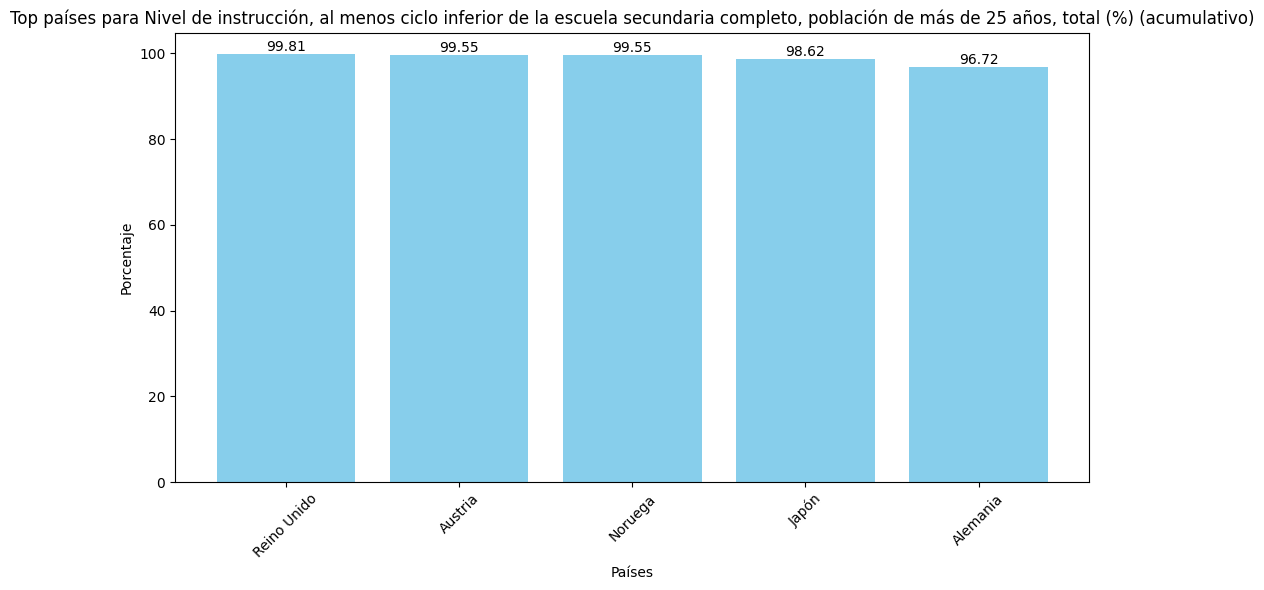

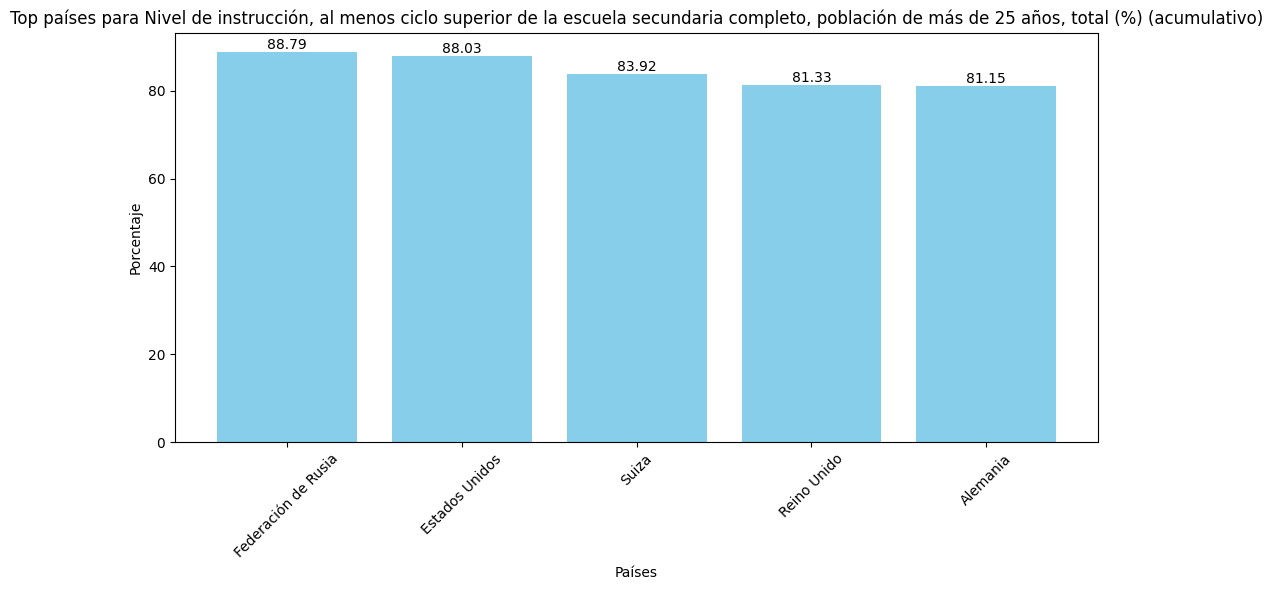

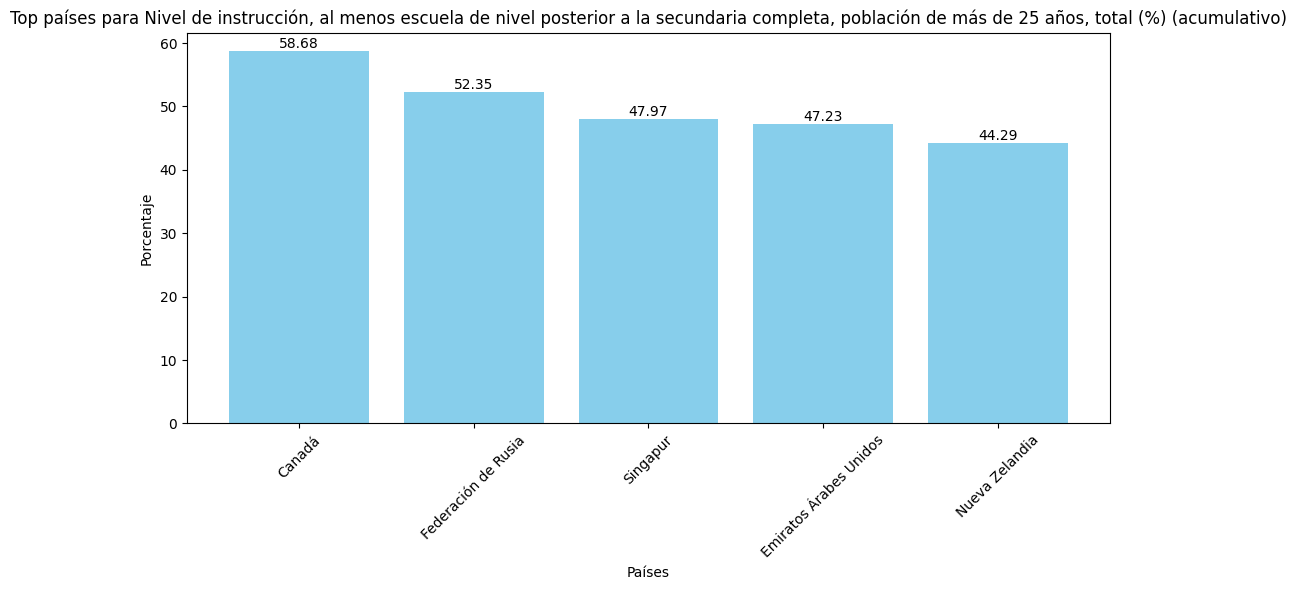

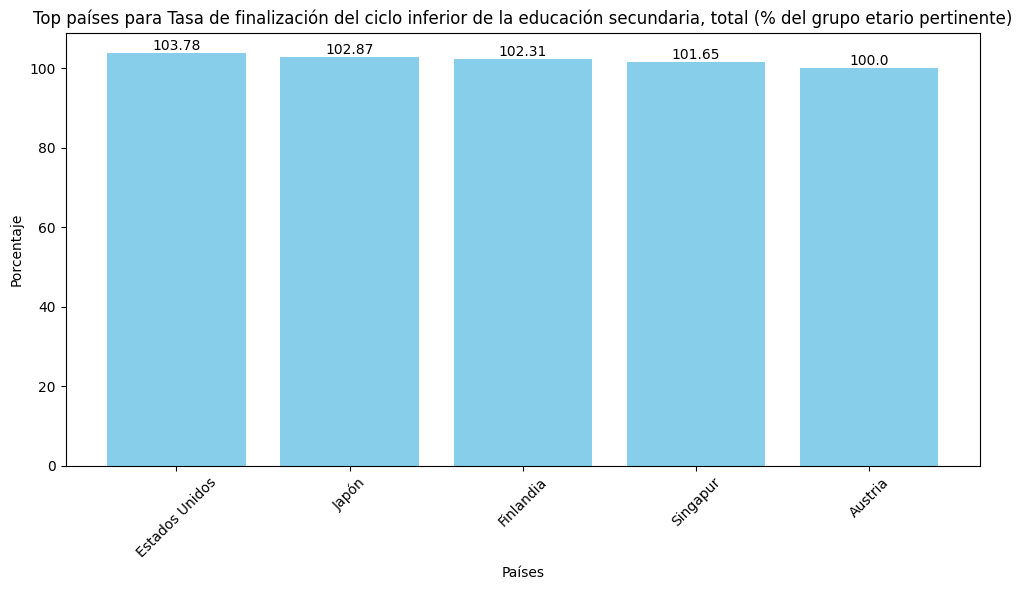

In [25]:


# Encontrar el top 5 de países para cada factor de la serie
factors = df_filled['factor_(serie)'].unique()  # Obtener la lista de factores únicos

for factor in factors:
    # Filtrar el DataFrame por cada factor de la serie
    filtered_df = df_filled[df_filled['factor_(serie)'] == factor]
    
    # Calcular la media de los valores por país en ese factor
    grouped = filtered_df.groupby('país')['Valor'].mean().reset_index()
    
    # Ordenar los valores por el porcentaje en orden descendente
    sorted_df = grouped.sort_values(by='Valor', ascending=False)
    
    # Obtener los top países para cada factor (puede ser menos de 5)
    top_countries = sorted_df.head(5)
    
    # Gráfico de barras para visualizar los top países con etiquetas de valores
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_countries['país'], top_countries['Valor'], color='skyblue')
    plt.title(f'Top países para {factor}')
    plt.xlabel('Países')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=45)
    
    # Etiquetas de valor en cada barra
    for bar, value in zip(bars, top_countries['Valor']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

In [33]:
#df_filled.to_csv('../Data/data_educacion_c.csv', index=False)